### Text Mining VS NLP
- 비 정형 데이터(텍스트)에서 의미 있는 정보를 추출하는 방법
- NLP(자연어 처리) : 사람이 사용하는 언어를 이해하고 예측하는 분야

#### Text Mining 분야
- 문서 분류 : text가 특정 카테고리에 속하는지 예측이 가능하는 분야
- 문서 요약 : text의 주요 내용을 추리는 분야
- 문서 군집 분석 : 문서끼리의 유사도를 비교 분석하는 분야
- 감성 분석 : text에 들어있는 감정이나 의도를 분석하는 분야

#### Text Mining 프로세스
1. 텍스트 전처리
    - 클렌징(대/소문자, 특수문자)
    - 불용어 제거(stop words)
    - 어근 추출(Stemming Lemmatization)
        - 영어 : NLTK
        - 한국어 : Konlpy(형태소 분석기)
    - 토큰화 : text를 일정 단위(ex.띄어쓰기, 형태소, 2-gram 등)로 분해하는 작업
2. 수치화/Feature Vector 화 : 토큰화 된 토큰들을 가지고 일정규칙에 따라 숫자를 변경하는 작업
    - 빈도 기반의 수치화(BOW, TF-IDF 등)
    - Word Emebdding
3. ML/DL 학습 -> 예측 -> 평가, 분석 

In [180]:
import pandas as pd

In [181]:
train = pd.read_csv("./data/unsmile_train_v1.0.tsv", delimiter = "\t")

In [182]:
train.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0


In [183]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


In [184]:
test = pd.read_csv("./data/unsmile_valid_v1.0.tsv", delimiter = "\t")

In [185]:
test.head()

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드로 싸웠더니 지금 서열 상타취노 식칼들고 니가...,0,1,0,0,0,0,0,0,0,0,0
1,여자들은 취미가 애낳는건가.. 취미를 좀 가져라,1,0,0,0,0,0,0,0,0,0,0
2,개슬람녀 다 필요없고 니 엄마만 있으면 된다,0,0,0,1,0,0,1,0,0,0,0
3,조팔ㅋㅋ 남한 길거리 돌아다니면 한국남자때문에 눈재기하는데 그걸 내 폰에 굳이 담아...,0,1,0,0,0,0,0,0,0,0,0
4,바지 내리다 한남들 와꾸 보고 올려뿟노,0,1,0,0,0,0,0,0,0,0,0


## 단어빈도 분석(워드 카운팅)

In [186]:
train

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15000,께롱께롱께롱!!!,0,0,0,0,0,0,0,0,0,1,0
15001,갱상도가아니라 홍어지 개좃같은 홍어년들,0,0,0,0,0,1,0,0,0,0,0
15002,말레이시아랑 인도네시아 여자 존나 못생겼던데,1,0,0,1,0,0,0,0,0,0,0
15003,링크도 안박고 가서 글 쓰자고 선동하네,0,0,0,0,0,0,0,0,1,0,0


In [187]:
text_train = train['문장']

In [188]:
# 토큰화 작업
tmp = [doc.split(" ") for doc in text_train]
tmp

[['일안하는', '시간은', '쉬고싶어서', '그런게', '아닐까'],
 ['아동성범죄와',
  '페도버는',
  '기록바',
  '끊어져',
  '영원히',
  '고통',
  '받는다.',
  '무슬림',
  '50퍼',
  '근친이다.',
  '10',
  '16까지',
  'IQ',
  '떨어지고',
  '출산',
  '위험은',
  '400%',
  '다.'],
 ['루나',
  '솔로앨범',
  '나왔을',
  '때부터',
  '머모',
  '기운',
  '있었음',
  'ㅇㅇ',
  'Keep',
  'o',
  '',
  'doin',
  '진짜',
  '띵곡임',
  '꼭',
  '들어보셈"'],
 ['홍팍에도',
  '어버이연합인가',
  '보내요',
  '뭐',
  '이런뎃글',
  '있는데',
  '이거',
  '어버이연합측에',
  '신고하면',
  '그쪽에서',
  '고소',
  '가능하냐?'],
 ['아놔',
  '왜',
  '여기',
  '댓들은',
  '다',
  '여자들이',
  '김치녀라고',
  '먼저',
  '불렸다!',
  '여자들은',
  '더',
  '심하게',
  '그런다!',
  '이렇게',
  '2개로',
  '싸우냐..',
  '내가',
  '볼',
  '땐',
  '둘다',
  '나쁜',
  '말',
  '그',
  '이상도',
  '이하도',
  '아닌데'],
 ['고향가서',
  '피방가면',
  '동네',
  '부럴',
  '친구들이랑은',
  '뭐',
  '거르는',
  '거',
  '없이',
  '이야기하니까',
  '막',
  '말하게',
  '되더라',
  '당연히',
  '키보드를',
  '치거나',
  '그러지는',
  '않는데',
  '말하는게',
  '많이',
  '거칠어지긴',
  '해',
  '반성해야겠네'],
 ['예수',
  '십새끼',
  '개새끼',
  '창녀아들',
  '애비실종',
  '가정교육',
  '못받은',
  '무뇌충',
  '허언증',
  '정신병자',
  '사기꾼

In [189]:
# 1D List로 변환 -> List 이어 붙이기 활용
token_list = []
for s in tmp:
    token_list += s

In [190]:
token_list

['일안하는',
 '시간은',
 '쉬고싶어서',
 '그런게',
 '아닐까',
 '아동성범죄와',
 '페도버는',
 '기록바',
 '끊어져',
 '영원히',
 '고통',
 '받는다.',
 '무슬림',
 '50퍼',
 '근친이다.',
 '10',
 '16까지',
 'IQ',
 '떨어지고',
 '출산',
 '위험은',
 '400%',
 '다.',
 '루나',
 '솔로앨범',
 '나왔을',
 '때부터',
 '머모',
 '기운',
 '있었음',
 'ㅇㅇ',
 'Keep',
 'o',
 '',
 'doin',
 '진짜',
 '띵곡임',
 '꼭',
 '들어보셈"',
 '홍팍에도',
 '어버이연합인가',
 '보내요',
 '뭐',
 '이런뎃글',
 '있는데',
 '이거',
 '어버이연합측에',
 '신고하면',
 '그쪽에서',
 '고소',
 '가능하냐?',
 '아놔',
 '왜',
 '여기',
 '댓들은',
 '다',
 '여자들이',
 '김치녀라고',
 '먼저',
 '불렸다!',
 '여자들은',
 '더',
 '심하게',
 '그런다!',
 '이렇게',
 '2개로',
 '싸우냐..',
 '내가',
 '볼',
 '땐',
 '둘다',
 '나쁜',
 '말',
 '그',
 '이상도',
 '이하도',
 '아닌데',
 '고향가서',
 '피방가면',
 '동네',
 '부럴',
 '친구들이랑은',
 '뭐',
 '거르는',
 '거',
 '없이',
 '이야기하니까',
 '막',
 '말하게',
 '되더라',
 '당연히',
 '키보드를',
 '치거나',
 '그러지는',
 '않는데',
 '말하는게',
 '많이',
 '거칠어지긴',
 '해',
 '반성해야겠네',
 '예수',
 '십새끼',
 '개새끼',
 '창녀아들',
 '애비실종',
 '가정교육',
 '못받은',
 '무뇌충',
 '허언증',
 '정신병자',
 '사기꾼',
 '망상',
 '근본없는',
 '병신',
 '장애인',
 '짱개',
 '흑인',
 '이슬람',
 '전라도랑',
 '동급',
 '나이쳐먹고',
 '피시방가는',
 '놈들은',
 '대가리에',


In [191]:
from collections import Counter # 빈도수 세어주는 도구
counter = Counter(token_list)

In [192]:
counter

Counter({'다': 661,
         '왜': 518,
         '진짜': 514,
         'ㅋㅋ': 401,
         '존나': 370,
         '더': 365,
         '그냥': 357,
         'ㅋㅋㅋ': 340,
         '좀': 261,
         '이': 243,
         '그': 236,
         '저': 234,
         '씨발': 226,
         '근데': 223,
         '시발': 219,
         'ㅋㅋㅋㅋ': 217,
         '안': 177,
         '하는': 171,
         '난': 170,
         '수': 169,
         '새끼들': 166,
         '저런': 165,
         '또': 154,
         '무슨': 153,
         '아니라': 146,
         '내가': 145,
         '하고': 145,
         '': 141,
         '있는': 140,
         '전라도': 139,
         'ㄹㅇ': 138,
         '너무': 136,
         '잘': 134,
         '뭐': 132,
         '이런': 132,
         '이기야': 128,
         '여자': 125,
         'ㅋ': 125,
         'ㅋㅋㅋㅋㅋ': 124,
         '보면': 123,
         '많이': 120,
         '지금': 117,
         '걍': 116,
         '같은': 114,
         '나도': 114,
         '어떻게': 113,
         '역시': 113,
         '거': 112,
         '저거': 109,
         '아': 108,
        

#### 혐오표현 카테고리 중에 한 가지를 선택해 단어 빈도 분석 진행

In [193]:
data_인종_국적_혐오 = train[train["인종/국적"] == 1]

In [194]:
data_인종_국적_혐오_문장 = data_인종_국적_혐오["문장"]

In [195]:
인종_국적_token = [s for doc in data_인종_국적_혐오_문장 for s in doc.split(" ")] # 컴프리 헨션에서는 2중포문도 가능

In [196]:
counter = Counter(인종_국적_token)

In [197]:
counter.most_common(50)

[('다', 94),
 ('존나', 85),
 ('진짜', 72),
 ('조선족', 68),
 ('왜', 68),
 ('새끼들', 62),
 ('더', 53),
 ('시발', 49),
 ('ㅋㅋ', 47),
 ('씨발', 47),
 ('ㅋㅋㅋ', 46),
 ('그냥', 43),
 ('중국', 41),
 ('이슬람', 38),
 ('개슬람', 37),
 ('짱깨', 37),
 ('그', 34),
 ('좀', 34),
 ('좆족', 34),
 ('ㅋㅋㅋㅋ', 33),
 ('난민', 32),
 ('무슬림', 30),
 ('근데', 28),
 ('똥남아', 28),
 ('저', 27),
 ('다문화', 25),
 ('하는', 25),
 ('ㄹㅇ', 25),
 ('동남아', 24),
 ('걍', 23),
 ('나라', 23),
 ('새끼들이', 23),
 ('뭐', 22),
 ('아니라', 22),
 ('=', 22),
 ('이', 22),
 ('새끼들은', 22),
 ('제발', 22),
 ('무슨', 21),
 ('한국에', 21),
 ('있는', 20),
 ('지들', 20),
 ('저런', 20),
 ('한국', 19),
 ('잘', 19),
 ('다문화는', 18),
 ('ㅋ', 18),
 ('탈북자', 18),
 ('여자', 18),
 ('안', 17)]

## 워드 클라우드

In [198]:
!pip install wordCloud

In [199]:
from wordcloud import WordCloud # 워드 클라우드 클래스

In [200]:
# 객체 생성
wc = WordCloud(
                background_color = 'white',
               font_path = "C:\\Windows\\Fonts\\malgun.ttf",
    random_state=425
              )

In [201]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15005 entries, 0 to 15004
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문장      15005 non-null  object
 1   여성/가족   15005 non-null  int64 
 2   남성      15005 non-null  int64 
 3   성소수자    15005 non-null  int64 
 4   인종/국적   15005 non-null  int64 
 5   연령      15005 non-null  int64 
 6   지역      15005 non-null  int64 
 7   종교      15005 non-null  int64 
 8   기타 혐오   15005 non-null  int64 
 9   악플/욕설   15005 non-null  int64 
 10  clean   15005 non-null  int64 
 11  개인지칭    15005 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 1.4+ MB


In [202]:
# 워드 클라우드 생성
input_str = " ".join(인종_국적_token)
result_cloud = wc.generate_from_text(input_str)                     

In [203]:
import matplotlib.pyplot as plt

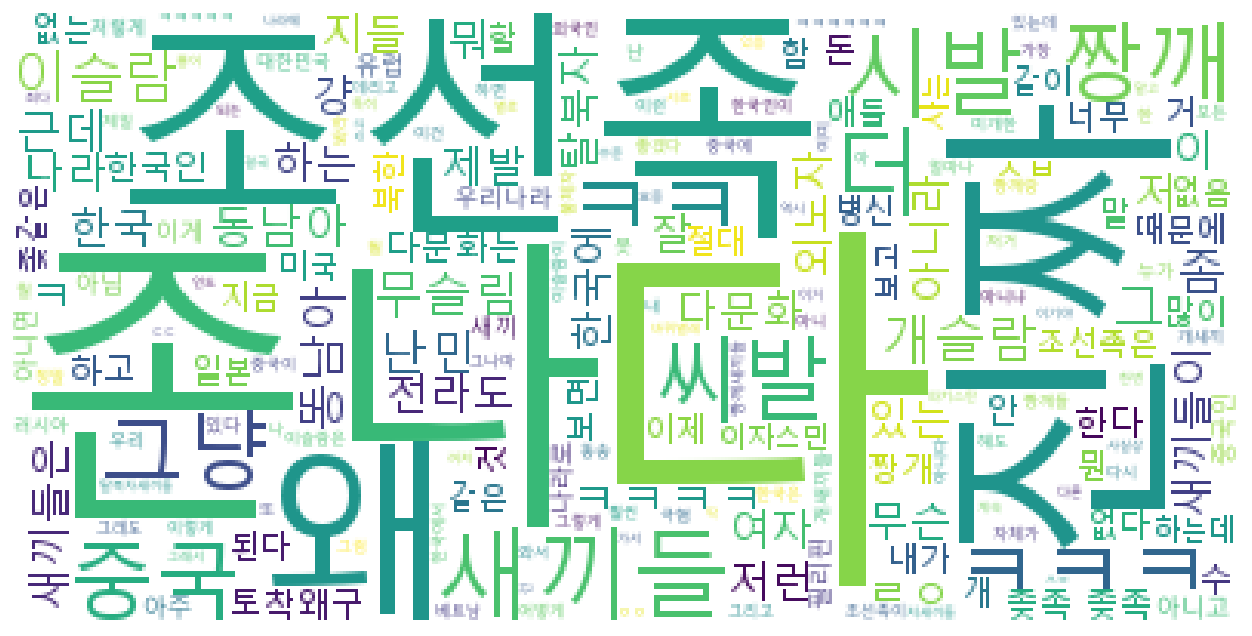

In [204]:
plt.figure(figsize = (20,8))
plt.imshow(result_cloud)
plt.axis("off")
plt.savefig("./word_cluod.png")
plt.show()

### 데이터 클랜징
- 한 글자 단어 삭제 -> 텍스트 마이닝에서는
- ㅋㅋㅋ, ㅎㅎㅎ 같은 반복적인 글자 삭제

In [205]:
import re # 정규 표현식, Regurlar Expression 

In [206]:
p = re.compile("[ㅋㅎㄷ~ㅡ>!]+") # 정규표현식 패턴

In [207]:
p.match(인종_국적_token[0])

In [208]:
clean_text = []
for token in 인종_국적_token:
    if len(token) < 2 : # 글자 개수가 2 미만 인가?
        continue
    elif p.match(token): # 정규표현식에 매칭되는가?
        continue
    clean_text.append(token)
        

In [209]:
clean_text

['예수',
 '십새끼',
 '개새끼',
 '창녀아들',
 '애비실종',
 '가정교육',
 '못받은',
 '무뇌충',
 '허언증',
 '정신병자',
 '사기꾼',
 '망상',
 '근본없는',
 '병신',
 '장애인',
 '짱개',
 '흑인',
 '이슬람',
 '전라도랑',
 '동급',
 '이슬람뺨치내',
 '갓슬람',
 '정희구현',
 '테러',
 'ㅅㅅㅅㅅ미제양키새끼들에게는',
 '테러가',
 '답이다좆같은',
 '양키',
 '씨발새끼들',
 '진짜',
 '저것들',
 '아주',
 '싫다,',
 '싫어.',
 '내가',
 '외국년놈들에게',
 '욕질',
 '괜히',
 '해대는',
 '아니다.',
 '이런',
 '기사',
 '한국에서도',
 '곧나오겠노',
 '개슬람',
 '난민',
 '많아지더만',
 '다문화',
 '극혐',
 '맞고',
 '다인종도',
 '위험하긴',
 '한데어차피',
 '일베서',
 '아무리',
 '극혐씹극혐',
 '소리',
 '해봤자',
 '변하는거',
 '없음',
 '존나',
 '뭉쳐서',
 '시위해야',
 '윗대가리들이',
 '들을랑말랑하는데',
 '우리',
 '일베충들이',
 '그럴',
 '위인들이',
 '얼마나',
 '있을까?그냥',
 '글러먹었다',
 '생각하고',
 '자기살길이나',
 '찾으면',
 '된다',
 '백인은',
 '애를',
 '안낳으니',
 '기독교가',
 '줄은거고',
 '이슬람은',
 '애를',
 '많이',
 '낳고',
 '불법이민',
 '존나가니',
 '늘어나고',
 '조선족',
 '개새끼들',
 '백린탄으로',
 '멸해야한다',
 '다문화는',
 '그종족의',
 '문화를',
 '존중하고',
 '지속시키며',
 '같이',
 '행복하게',
 '사는건대',
 '이나라는',
 '짬뽕이네',
 '시부랄거',
 '개소리하노',
 '시발라마',
 '조선족이',
 '중국인인데',
 '중국인보다라니',
 '개소리야',
 '조선족',
 '==',
 '중국인',
 '동일',
 '어제',
 '날이냐?',
 '어제',
 '쓰까국'

In [210]:
input_str = " ".join(clean_text)
result_cloud = wc.generate_from_text(input_str)

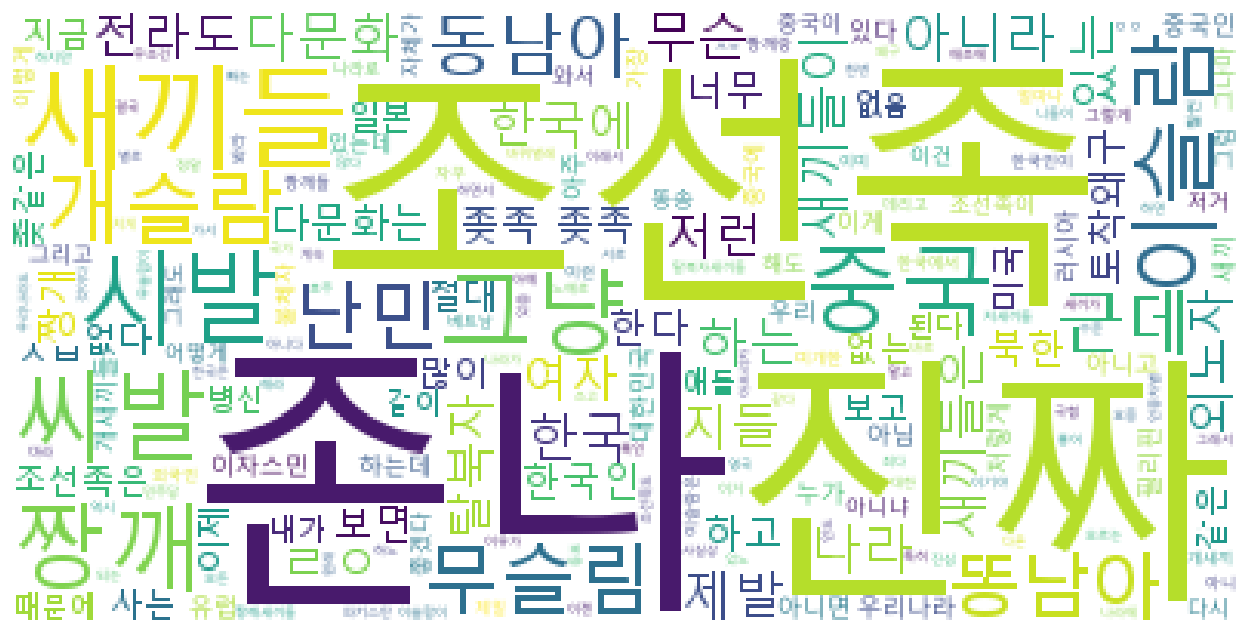

In [211]:
plt.figure(figsize = (20,8))
plt.imshow(result_cloud)
plt.axis("off")
plt.show()

### 감성분석
- 혐오 표현 : 0, 악플/욕설 : 1, clean : 2

In [212]:
train["혐오표현"] = train.loc[:,"여성/가족":"기타 혐오"].sum(axis =1)

In [213]:
train

,문장,여성/가족,남성,성소수자,인종/국적,연령,지역,종교,기타 혐오,악플/욕설,clean,개인지칭,혐오표현
0,일안하는 시간은 쉬고싶어서 그런게 아닐까,0,0,0,0,0,0,0,0,0,1,0,0
1,아동성범죄와 페도버는 기록바 끊어져 영원히 고통 받는다. 무슬림 50퍼 근친이다. ...,0,0,0,0,0,0,1,0,0,0,0,1
2,루나 솔로앨범 나왔을 때부터 머모 기운 있었음 ㅇㅇ Keep o doin 진짜 띵...,0,0,0,0,0,0,0,0,0,1,0,0
3,홍팍에도 어버이연합인가 보내요 뭐 이런뎃글 있는데 이거 어버이연합측에 신고하면 그쪽...,0,0,0,0,0,0,0,0,0,1,0,0
4,아놔 왜 여기 댓들은 다 여자들이 김치녀라고 먼저 불렸다! 여자들은 더 심하게 그런...,1,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15000,께롱께롱께롱!!!,0,0,0,0,0,0,0,0,0,1,0,0
15001,갱상도가아니라 홍어지 개좃같은 홍어년들,0,0,0,0,0,1,0,0,0,0,0,1
15002,말레이시아랑 인도네시아 여자 존나 못생겼던데,1,0,0,1,0,0,0,0,0,0,0,2
15003,링크도 안박고 가서 글 쓰자고 선동하네,0,0,0,0,0,0,0,0,1,0,0,0


In [214]:
train2 = train[["문장", "혐오표현", "악플/욕설", "clean"]]

In [215]:
def label(row):# axis를 1로 설정할 경우 각 행들이 Series 형으로 넘어옴
    if row["혐오표현"] >= 1: # 
        return 0
    elif row["악플/욕설"] >= 1:
        return 1
    else : 
        return 2

In [216]:
y_train = train2.apply(label,axis =1)

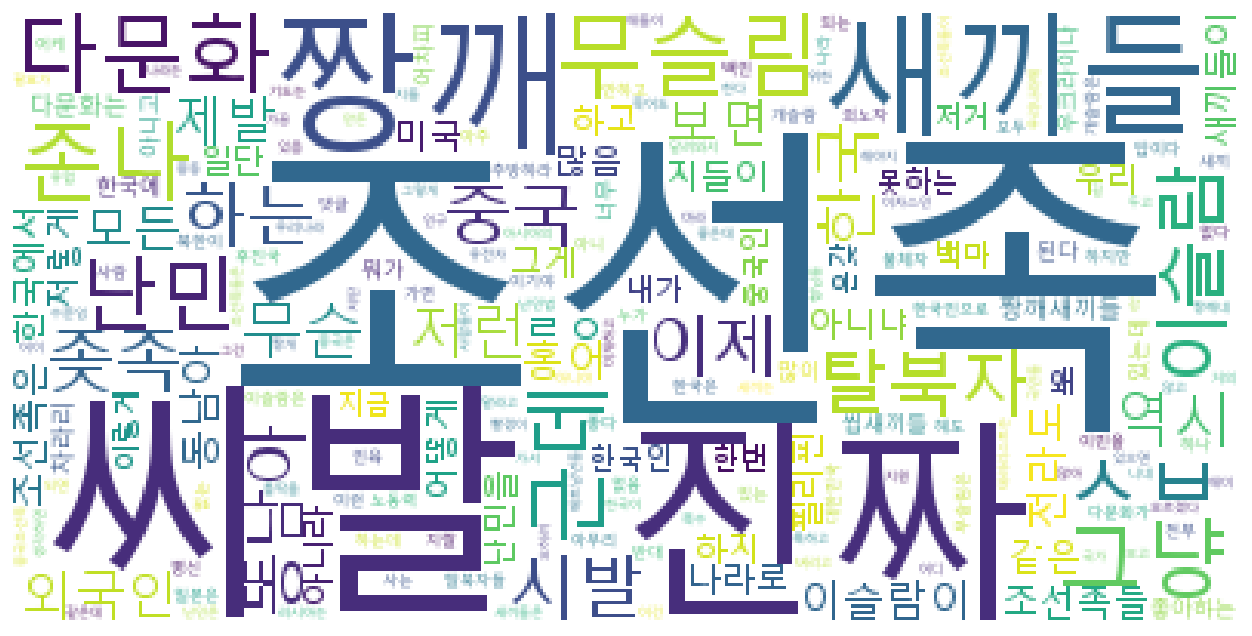

In [217]:
# test set도 정답데이터 만들어주기
test_인종_국적_혐오 = test[test["인종/국적"] == 1]
test_인종_국적_혐오_문장 = test_인종_국적_혐오["문장"]
test_인종_국적_token = [s for doc in test_인종_국적_혐오_문장 for s in doc.split(" ")] # 컴프리 헨션에서는 2중포문도 가능
counter = Counter(test_인종_국적_token)
counter.most_common(50)

p = re.compile("[ㅋㅎㄷ~ㅡ>!]+") # 정규표현식 패턴

clean_text = []
for token in test_인종_국적_token:
    if len(token) < 2 : # 글자 개수가 2 미만 인가?
        continue
    elif p.match(token): # 정규표현식에 매칭되는가?
        continue
    clean_text.append(token)


input_str = " ".join(clean_text)
result_cloud = wc.generate_from_text(input_str)

plt.figure(figsize = (20,8))
plt.imshow(result_cloud)
plt.axis("off")
plt.show()

In [218]:
test["혐오표현"] = test.loc[:,"여성/가족":"기타 혐오"].sum(axis =1)
test2 = test[["문장", "혐오표현", "악플/욕설", "clean"]]
y_test = test2.apply(label,axis =1)

In [219]:
y_test, y_train

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 3732    0
 3733    1
 3734    0
 3735    0
 3736    0
 Length: 3737, dtype: int64,
 0        2
 1        0
 2        2
 3        2
 4        0
         ..
 15000    2
 15001    0
 15002    0
 15003    1
 15004    0
 Length: 15005, dtype: int64)

##### 감성분석 순서
- 문제정의 - 수집 - 전처리 - 토큰화 - 수치화 - 학습 - 예측 - 평가, 분석

In [220]:
!pip install konlpy

In [221]:
from konlpy.tag import Okt

In [222]:
okt = Okt()

In [223]:
okt.morphs("아버지가 방에 들어가신다") # 품사 별로 분리

['아버지', '가', '방', '에', '들어가신다']

In [224]:
# 품사(pos) 태깅
okt.pos("아버지가 방에 들어가신다")

[('아버지', 'Noun'),
 ('가', 'Josa'),
 ('방', 'Noun'),
 ('에', 'Josa'),
 ('들어가신다', 'Verb')]

In [225]:
okt.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

In [226]:
from konlpy.tag import Kkma
# 성능 :  kkma > komoran > okt > hannanum

In [227]:
kkma = Kkma()

In [228]:
kkma.nouns("아버지가 방에 들어가신다") # 명사만 추출

['아버지', '방']

In [229]:
kkma.morphs("아버지가 방에 들어가신다")

['아버지', '가', '방', '에', '들어가', '시', 'ㄴ다']

In [230]:
kkma.pos("아버지가 방에 들어가신다")

[('아버지', 'NNG'),
 ('가', 'JKS'),
 ('방', 'NNG'),
 ('에', 'JKM'),
 ('들어가', 'VV'),
 ('시', 'EPH'),
 ('ㄴ다', 'EFN')]

In [231]:
kkma.tagset

{'EC': '연결 어미',
 'ECD': '의존적 연결 어미',
 'ECE': '대등 연결 어미',
 'ECS': '보조적 연결 어미',
 'EF': '종결 어미',
 'EFA': '청유형 종결 어미',
 'EFI': '감탄형 종결 어미',
 'EFN': '평서형 종결 어미',
 'EFO': '명령형 종결 어미',
 'EFQ': '의문형 종결 어미',
 'EFR': '존칭형 종결 어미',
 'EP': '선어말 어미',
 'EPH': '존칭 선어말 어미',
 'EPP': '공손 선어말 어미',
 'EPT': '시제 선어말 어미',
 'ET': '전성 어미',
 'ETD': '관형형 전성 어미',
 'ETN': '명사형 전성 어미',
 'IC': '감탄사',
 'JC': '접속 조사',
 'JK': '조사',
 'JKC': '보격 조사',
 'JKG': '관형격 조사',
 'JKI': '호격 조사',
 'JKM': '부사격 조사',
 'JKO': '목적격 조사',
 'JKQ': '인용격 조사',
 'JKS': '주격 조사',
 'JX': '보조사',
 'MA': '부사',
 'MAC': '접속 부사',
 'MAG': '일반 부사',
 'MD': '관형사',
 'MDN': '수 관형사',
 'MDT': '일반 관형사',
 'NN': '명사',
 'NNB': '일반 의존 명사',
 'NNG': '보통명사',
 'NNM': '단위 의존 명사',
 'NNP': '고유명사',
 'NP': '대명사',
 'NR': '수사',
 'OH': '한자',
 'OL': '외국어',
 'ON': '숫자',
 'SE': '줄임표',
 'SF': '마침표, 물음표, 느낌표',
 'SO': '붙임표(물결,숨김,빠짐)',
 'SP': '쉼표,가운뎃점,콜론,빗금',
 'SS': '따옴표,괄호표,줄표',
 'SW': '기타기호 (논리수학기호,화폐기호)',
 'UN': '명사추정범주',
 'VA': '형용사',
 'VC': '지정사',
 'VCN': "부정 지정사, 형용사 '아니다'",
 'VC

## 수치화(벡터화)
- BOW(Bag of words): 문장에서 특정단어의 등장 빈도수를 수치화 하는 방법
  

In [232]:
from sklearn.feature_extraction.text import CountVectorizer # BOW 클래스 불러오기

In [233]:
sample_text = ["나는 오늘 점심에 삼계탕을 먹었다", "너 저녂에 운동 갈꺼야?", "나는 저녘에 운동하러 갈꺼야", "좋겠다. 나는 저녁에 야간 자율학습하러 갈껀데 "]

In [234]:
sample_cv = CountVectorizer() # BOW 객체 생성(초기화)
# 단어 사전 구축
sample_cv.fit(sample_text)

CountVectorizer()

In [235]:
pd.Series(sample_cv.vocabulary_).sort_values()

갈꺼야        0
갈껀데        1
나는         2
먹었다        3
삼계탕을       4
야간         5
오늘         6
운동         7
운동하러       8
자율학습하러     9
저녁에       10
저녂에       11
저녘에       12
점심에       13
좋겠다       14
dtype: int64

In [236]:
from tqdm import tqdm as tq
# 타카듐 : 반복문의 진행 상황을 출력하는 도구

In [237]:
train_morphs = []
for txt in tq(text_train) :
    # print(txt)  # 시리즈 형인 0차원의 문자열을 보여줌
    morphs = okt.morphs(txt)
    train_morphs.append(morphs)

100%|███████████████████████████████████████████████████████████████████████████| 15005/15005 [01:09<00:00, 215.25it/s]


In [238]:
test_morphs = []
for txt in tq(test2["문장"]) :
    # print(txt)  # 시리즈 형인 0차원의 문자열을 보여줌
    morphs = okt.morphs(txt)
    test_morphs.append(morphs)

100%|█████████████████████████████████████████████████████████████████████████████| 3737/3737 [00:15<00:00, 244.68it/s]


In [239]:
train_morphs

[['일안하는', '시간', '은', '쉬고싶어서', '그런게', '아닐까'],
 ['아동',
  '성범죄',
  '와',
  '페도버',
  '는',
  '기록',
  '바',
  '끊어져',
  '영원히',
  '고통',
  '받는다',
  '.',
  '무슬림',
  '50',
  '퍼',
  '근',
  '친',
  '이다',
  '.',
  '10',
  '16',
  '까지',
  'IQ',
  '떨어지고',
  '출산',
  '위험',
  '은',
  '400%',
  '다',
  '.'],
 ['루나',
  '솔로',
  '앨범',
  '나왔을',
  '때',
  '부터',
  '머모',
  '기운',
  '있었음',
  'ㅇㅇ',
  'Keep',
  'o',
  'doin',
  '진짜',
  '띵곡임',
  '꼭',
  '들어',
  '보셈',
  '"'],
 ['홍팍',
  '에도',
  '어버이연합',
  '인가',
  '보내요',
  '뭐',
  '이런',
  '뎃글',
  '있는데',
  '이',
  '거',
  '어버이연합',
  '측',
  '에',
  '신고',
  '하면',
  '그',
  '쪽',
  '에서',
  '고소',
  '가능하냐',
  '?'],
 ['아',
  '놔',
  '왜',
  '여기',
  '댓',
  '들',
  '은',
  '다',
  '여자',
  '들',
  '이',
  '김치',
  '녀',
  '라고',
  '먼저',
  '불렸다',
  '!',
  '여자',
  '들',
  '은',
  '더',
  '심하게',
  '그런다',
  '!',
  '이렇게',
  '2',
  '개',
  '로',
  '싸우냐',
  '..',
  '내',
  '가',
  '볼',
  '땐',
  '둘다',
  '나쁜',
  '말',
  '그',
  '이상',
  '도',
  '이하',
  '도',
  '아닌데'],
 ['고',
  '향가',
  '서',
  '피방',
  '가면',
  '동네',
  '부럴',
 

In [240]:
p = re.compile("[ㅋㅎㄷ~!.?,0-9a-zA-Z]+")  #정규표현식 패턴 생성

In [241]:
clean_text_train = []
for sentence in train_morphs :  # 한 문장씩 꺼내오는 반복문
    # print(sentence) # 2차원의 요소인 1차원을 들여다봄.. 각 단어, 요소에 접근해야 하니까 한 번더 접근 필요
    tmp = []
    for token in sentence :  # 형태소 단위로 쪼개진 token을 꺼내오는 반복문
        # print(token)
        if len(token) < 2:
            continue
        elif p.match(token) :
            continue
        tmp.append(token)
    clean_text_train.append(tmp)

In [242]:
clean_text_train

[['일안하는', '시간', '쉬고싶어서', '그런게', '아닐까'],
 ['아동',
  '성범죄',
  '페도버',
  '기록',
  '끊어져',
  '영원히',
  '고통',
  '받는다',
  '무슬림',
  '이다',
  '까지',
  '떨어지고',
  '출산',
  '위험'],
 ['루나',
  '솔로',
  '앨범',
  '나왔을',
  '부터',
  '머모',
  '기운',
  '있었음',
  'ㅇㅇ',
  '진짜',
  '띵곡임',
  '들어',
  '보셈'],
 ['홍팍',
  '에도',
  '어버이연합',
  '인가',
  '보내요',
  '이런',
  '뎃글',
  '있는데',
  '어버이연합',
  '신고',
  '하면',
  '에서',
  '고소',
  '가능하냐'],
 ['여기',
  '여자',
  '김치',
  '라고',
  '먼저',
  '불렸다',
  '여자',
  '심하게',
  '그런다',
  '이렇게',
  '싸우냐',
  '둘다',
  '나쁜',
  '이상',
  '이하',
  '아닌데'],
 ['향가',
  '피방',
  '가면',
  '동네',
  '부럴',
  '친구',
  '이랑은',
  '거르',
  '없이',
  '이야기',
  '하니까',
  '하게',
  '되더라',
  '당연히',
  '보드',
  '치거나',
  '그러지는',
  '않는데',
  '하는게',
  '많이',
  '거칠어지긴',
  '반성',
  '해야겠네'],
 ['예수',
  '새끼',
  '개새끼',
  '창녀',
  '아들',
  '애비',
  '실종',
  '가정교육',
  '받은',
  '무뇌충',
  '허언증',
  '정신병',
  '사기꾼',
  '망상',
  '근본',
  '없는',
  '병신',
  '장애인',
  '짱개',
  '흑인',
  '이슬람',
  '전라도'],
 ['나이', '먹고', '피시방', '가는', '대가리', '만찬', '들임'],
 ['출산',
  '같은',
  '소리',
  '하네',
  '우리나라

In [243]:
clean_text_test = []
for sentence in test_morphs :  # 한 문장씩 꺼내오는 반복문
    # print(sentence) # 2차원의 요소인 1차원을 들여다봄.. 각 단어, 요소에 접근해야 하니까 한 번더 접근 필요
    tmp = []
    for token in sentence :  # 형태소 단위로 쪼개진 token을 꺼내오는 반복문
        # print(token)
        if len(token) < 2:
            continue
        elif p.match(token) :
            continue
        tmp.append(token)
    clean_text_test.append(tmp)

In [244]:
clean_text_test

[['ㅇㄱㄹㅇ',
  '진짜',
  '죽어도',
  '상관없다는',
  '마인드',
  '싸웠더니',
  '지금',
  '서열',
  '상타취노',
  '식칼',
  '찌르면',
  '찌른다',
  '했더니',
  '애비',
  '알아서',
  '기노',
  '한번',
  '서열',
  '잡고',
  '개길',
  '마다',
  '세게',
  '나가면',
  '확실하게',
  '짓누를수있다'],
 ['여자', '취미', '낳는', '건가', '취미', '가져라'],
 ['개슬람녀', '필요없고', '엄마', '있으면', '된다'],
 ['조팔',
  '남한',
  '길거리',
  '돌아다니면',
  '한국',
  '남자',
  '때문',
  '재기하는데',
  '그걸',
  '굳이',
  '담아',
  '야하노',
  '조팔'],
 ['바지', '리다', '한남', '보고', '올려뿟노'],
 ['새끼', '슈스케', '새끼', '잖아'],
 ['모든',
  '이슬람',
  '테러리스트',
  '아니지만',
  '모든',
  '테러리스트',
  '이슬람',
  '이다',
  '자유민주',
  '국가',
  '에서',
  '테러',
  '분자',
  '감시',
  '텄고',
  '막는게',
  '최선',
  '아닌가요'],
 ['남자', '역시', '남충', '절레절레'],
 ['그만해라', '새끼', '달려와서', '좆족', '으로', '몰아', '간다', '이제'],
 ['잘생긴', '음절', '대로', '여자', '보임', 'ㅇㅇ'],
 ['여성혐오',
  '아니고',
  '상식',
  '비상',
  '문제',
  '이다',
  '한국사',
  '회의',
  '되는거지',
  '될거라고',
  '생각',
  '하는건',
  '대가',
  '리좀'],
 ['오히려', '태평양', '패권', '두고', '싸운', '일본', '들이', '두렵게', '느껴지는게', '정상', '인데'],
 ['전라도', '마인드', '통수쩌', '위선'],
 ['두번째', '펨섭

In [245]:
# 단어 사전 확인
sample_cv.vocabulary_

# 빈도수 아님-> 컬럼번호(인덱스 번호)!

{'나는': 2,
 '오늘': 6,
 '점심에': 13,
 '삼계탕을': 4,
 '먹었다': 3,
 '저녂에': 11,
 '운동': 7,
 '갈꺼야': 0,
 '저녘에': 12,
 '운동하러': 8,
 '좋겠다': 14,
 '저녁에': 10,
 '야간': 5,
 '자율학습하러': 9,
 '갈껀데': 1}

In [246]:
# 단어 사전을 기반으로 빈도를 세서 수치화
result = sample_cv.transform(sample_text) # 수치화

In [247]:
result.toarray()

array([[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1]], dtype=int64)

In [248]:
pd.DataFrame(result.toarray(), columns=pd.Series(sample_cv.vocabulary_).sort_values().index)

,갈꺼야,갈껀데,나는,먹었다,삼계탕을,야간,오늘,운동,운동하러,자율학습하러,저녁에,저녂에,저녘에,점심에,좋겠다
0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,0,1,1,0,0,1,0,0,0,1,1,0,0,0,1


##### 실제 데이터에다가 Vectorizer 적용!

In [249]:
unsmile_cv = CountVectorizer(
                                stop_words=["으로", "이다", "하고", "부터"],
                                ngram_range = (1,2), # bi-gram 설정
                                max_df = 0.9, # 최대 등장 빈도, 0 ~ 1 or int, 지정된 임계값 보다 높은 빈도의 경우 단어 사전 채택
                                min_df = 10 # 최대 등장 빈도, 0 ~ 1 or int, 지정된 임계값보다 높은 빈도의 경우 단어사전 무시
                            )

In [250]:
# CountVectorizer의 입력값은 ID(요소는 문자열)
# 2D 데이터를 띄어쓰기 단위로 다시 문자열을 요소로 가지는 1D로 바꿔줌

# " ".join(clean_text_train[3])
clean_text_train2 = [" ".join(txt) for txt in clean_text_train]
clean_text_test2 = [" ".join(txt) for txt in clean_text_test]
clean_text_train2[:5], clean_text_test2[:5]

(['일안하는 시간 쉬고싶어서 그런게 아닐까',
  '아동 성범죄 페도버 기록 끊어져 영원히 고통 받는다 무슬림 이다 까지 떨어지고 출산 위험',
  '루나 솔로 앨범 나왔을 부터 머모 기운 있었음 ㅇㅇ 진짜 띵곡임 들어 보셈',
  '홍팍 에도 어버이연합 인가 보내요 이런 뎃글 있는데 어버이연합 신고 하면 에서 고소 가능하냐',
  '여기 여자 김치 라고 먼저 불렸다 여자 심하게 그런다 이렇게 싸우냐 둘다 나쁜 이상 이하 아닌데'],
 ['ㅇㄱㄹㅇ 진짜 죽어도 상관없다는 마인드 싸웠더니 지금 서열 상타취노 식칼 찌르면 찌른다 했더니 애비 알아서 기노 한번 서열 잡고 개길 마다 세게 나가면 확실하게 짓누를수있다',
  '여자 취미 낳는 건가 취미 가져라',
  '개슬람녀 필요없고 엄마 있으면 된다',
  '조팔 남한 길거리 돌아다니면 한국 남자 때문 재기하는데 그걸 굳이 담아 야하노 조팔',
  '바지 리다 한남 보고 올려뿟노'])

In [251]:
unsmile_cv.fit(clean_text_train2 + clean_text_test2)

CountVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2),
                stop_words=['으로', '이다', '하고', '부터'])

In [252]:
len(unsmile_cv.vocabulary_) # 단어사전확인

2812

In [253]:
# 단어사전 기반으로 수치화 수행
trans_X_train = unsmile_cv.transform(clean_text_train2)
trans_X_test = unsmile_cv.transform(clean_text_test2)

In [254]:
trans_X_train

<15005x2812 sparse matrix of type '<class 'numpy.int64'>'
	with 88707 stored elements in Compressed Sparse Row format>

#### 모델링

In [255]:
from sklearn.linear_model import LogisticRegression # 선형 분류 모델
from sklearn.model_selection import cross_val_score # 검증용 도구

In [256]:
lr_clf = LogisticRegression(max_iter=10000)

In [257]:
cross_val_score(lr_clf, trans_X_train, y_train, cv= 5).mean()

0.6859713428857048

In [258]:
# 하이퍼 파라미터 튜닝 + 하나의 기능으로도 묶어보기!
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [259]:
unsmile_pipeline = Pipeline(
    [("unsmile_cv", CountVectorizer(stop_words=["으로", "이다", "하고", "부터"])),
     ("unsmile_logi", LogisticRegression(max_iter=10000))]
)

In [260]:
unsmile_pipeline

Pipeline(steps=[('unsmile_cv',
                 CountVectorizer(stop_words=['으로', '이다', '하고', '부터'])),
                ('unsmile_logi', LogisticRegression(max_iter=10000))])

In [261]:
grid_params = {
    "unsmile_cv__max_df" : [0.9, 0.85, 0.8],
    "unsmile_cv__min_df" : [10, 20, 30, 40],
    "unsmile_cv__ngram_range" : [(1, 1), (1, 2), (1, 3)],
    "unsmile_logi__C" : [100, 10, 1, 0.1, 0.01, 0.001],
}

In [262]:
grid = GridSearchCV(
    unsmile_pipeline,
    grid_params,
    cv = 3,
    n_jobs = -1,
)

In [263]:
clean_text_train2

['일안하는 시간 쉬고싶어서 그런게 아닐까',
 '아동 성범죄 페도버 기록 끊어져 영원히 고통 받는다 무슬림 이다 까지 떨어지고 출산 위험',
 '루나 솔로 앨범 나왔을 부터 머모 기운 있었음 ㅇㅇ 진짜 띵곡임 들어 보셈',
 '홍팍 에도 어버이연합 인가 보내요 이런 뎃글 있는데 어버이연합 신고 하면 에서 고소 가능하냐',
 '여기 여자 김치 라고 먼저 불렸다 여자 심하게 그런다 이렇게 싸우냐 둘다 나쁜 이상 이하 아닌데',
 '향가 피방 가면 동네 부럴 친구 이랑은 거르 없이 이야기 하니까 하게 되더라 당연히 보드 치거나 그러지는 않는데 하는게 많이 거칠어지긴 반성 해야겠네',
 '예수 새끼 개새끼 창녀 아들 애비 실종 가정교육 받은 무뇌충 허언증 정신병 사기꾼 망상 근본 없는 병신 장애인 짱개 흑인 이슬람 전라도',
 '나이 먹고 피시방 가는 대가리 만찬 들임',
 '출산 같은 소리 하네 우리나라 계집 의무 으로 군대 보내면 해결 일이 정신 개조 부터 시켜야지 할꺼 하고 무슨 낳고 무슨 자식 교육 하냐',
 '재능 ㅂㅅㅌㅊ 나도 합성 배우고싶다이기',
 '가짜 남자 어떻게 생겼냐',
 '이슬람 치내',
 '어린이집 월요일 데려다주고 금요일 데리 왔단다 가슴 너무 아프다 고작 아가 얼마나 외로웠을까',
 '갓슬람 정희 구현 테러 ㅅㅅㅅㅅ 미제 양키 새끼 에게는 테러 이다 같은 양키 씨발 새끼',
 '따고 넘어갔나 보네',
 '리더십 메시지 내부 결속 강화하고 외부 리마 커블 이미지 구축 하여 다시 교회 일수 있기를 소망 하고 도합',
 '협박 스킬 시브 랑께',
 '위로 격려 호텔 에서 여자도 정상 아니구만 완전 지네 할아버지 보다 나이 많을듯 토나올꺼 같은데 둘다 미쳤구만 그렇게 더러운 짓은 하고 설교 어떻게 하는거야',
 '메틸 알콜 에서 쓰고 있다 질문 받는다 프로 에틸 프로 메틸 들어간다 공업 에틸 알콜 면세 불법 으로 제조 때문 프로 정도 메틸 들어가면서 조방 지용 으로 쓴다',
 '띄울 사람 진짜 없긴 없나보다',
 '한국 유정 수준',
 '절절 

In [264]:
grid.fit(clean_text_train2, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('unsmile_cv',
                                        CountVectorizer(stop_words=['으로', '이다',
                                                                    '하고',
                                                                    '부터'])),
                                       ('unsmile_logi',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'unsmile_cv__max_df': [0.9, 0.85, 0.8],
                         'unsmile_cv__min_df': [10, 20, 30, 40],
                         'unsmile_cv__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'unsmile_logi__C': [100, 10, 1, 0.1, 0.01, 0.001]})

In [265]:
grid.best_params_

{'unsmile_cv__max_df': 0.9,
 'unsmile_cv__min_df': 10,
 'unsmile_cv__ngram_range': (1, 2),
 'unsmile_logi__C': 0.1}

In [266]:
# best model
best_model = grid.best_estimator_

In [267]:
best_model.score(clean_text_test2, y_test)

0.6978860048166979

### 모델 저장 및 로드

In [268]:
import pickle # 파이썬에 존재하는 모든 데이터 타입을 파일로 저장

In [269]:
with open("./unsmile_model.pkl", "wb") as f:
    pickle.dump(best_model, f) # best_model을 확장자로 저장!

In [270]:
with open("./unsmile_model.pkl", "rb") as f:
    my_bm = pickle.load(f)

In [271]:
my_bm

Pipeline(steps=[('unsmile_cv',
                 CountVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2),
                                 stop_words=['으로', '이다', '하고', '부터'])),
                ('unsmile_logi', LogisticRegression(C=0.1, max_iter=10000))])

In [272]:
my_bm.steps[0][1]

CountVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2),
                stop_words=['으로', '이다', '하고', '부터'])

In [273]:
my_bm.steps

[('unsmile_cv',
  CountVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2),
                  stop_words=['으로', '이다', '하고', '부터'])),
 ('unsmile_logi', LogisticRegression(C=0.1, max_iter=10000))]

### 학습 결과 시각화
- 모델링 분석 기법 중 가중치 분석
    - 어떠한 token(단어)이 혐오표현/악플/clean 을 결정 짓는 데있어서 , 영향을 많이 주었는가?

In [274]:
# 각각 독립적인 객체에 접근
cv = my_bm.steps[0][1]
logi = my_bm.steps[1][1]

In [275]:
logi

LogisticRegression(C=0.1, max_iter=10000)

In [276]:
# 단어 사전 추출
cv

CountVectorizer(max_df=0.9, min_df=10, ngram_range=(1, 2),
                stop_words=['으로', '이다', '하고', '부터'])

In [277]:
cv.vocabulary_

{'시간': 1090,
 '아닐까': 1198,
 '아동': 1201,
 '성범죄': 1035,
 '고통': 182,
 '받는다': 783,
 '무슬림': 721,
 '까지': 304,
 '출산': 1961,
 'ㅇㅇ': 14,
 '진짜': 1906,
 '들어': 548,
 '에도': 1344,
 '인가': 1577,
 '이런': 1531,
 '있는데': 1640,
 '신고': 1120,
 '하면': 2125,
 '에서': 1346,
 '고소': 180,
 '여기': 1354,
 '여자': 1365,
 '김치': 300,
 '라고': 576,
 '먼저': 678,
 '이렇게': 1537,
 '둘다': 532,
 '나쁜': 330,
 '이상': 1551,
 '이하': 1573,
 '아닌데': 1197,
 '가면': 40,
 '동네': 490,
 '친구': 1974,
 '거르': 120,
 '없이': 1335,
 '이야기': 1559,
 '하니까': 2107,
 '하게': 2075,
 '당연히': 437,
 '하는게': 2101,
 '많이': 640,
 '반성': 778,
 '예수': 1399,
 '새끼': 990,
 '개새끼': 106,
 '창녀': 1932,
 '아들': 1202,
 '애비': 1269,
 '받은': 787,
 '정신병': 1760,
 '사기꾼': 940,
 '망상': 649,
 '근본': 270,
 '없는': 1323,
 '병신': 832,
 '장애인': 1699,
 '짱개': 1918,
 '흑인': 2268,
 '이슬람': 1556,
 '전라도': 1727,
 '나이': 345,
 '먹고': 668,
 '가는': 32,
 '대가리': 443,
 '들임': 556,
 '같은': 92,
 '소리': 1060,
 '하네': 2087,
 '우리나라': 1438,
 '의무': 1491,
 '군대': 226,
 '해결': 2185,
 '일이': 1617,
 '정신': 1758,
 '무슨': 720,
 '자식': 1672,
 '교육': 208,
 '하냐

In [278]:
voca = cv.vocabulary_

In [279]:
weight = logi.coef_[0] # 혐오 표현 클래스에 대한 가중치 값들

In [280]:
weight

array([ 0.02027286,  0.08625224,  0.1997405 , ...,  0.06942804,
        0.02963514, -0.07036453])

In [281]:
unsmile_df = pd.DataFrame([voca.keys(),voca.values()]).T
unsmile_df.columns = ["단어", "인덱스"]

In [282]:
unsmile_df.sort_values(by = "인덱스", inplace=True) # 실제 인덱스 번호가 중구난방이기 때문에, 오름차순 정렬

In [283]:
unsmile_df

,단어,인덱스
1108,ㄱㄱ,0
899,ㄴㄴ,1
624,ㄹㅇ,2
1145,ㄹㅇ 이노,3
1214,ㅁㅊ,4
...,...,...
58,흑인,2268
1459,희생,2269
914,히잡,2270
1495,힘든,2271


In [284]:
unsmile_df.set_index("인덱스", inplace=True) # 진짜 인덱스를 인덱스 자리에 배치

In [285]:
unsmile_df

,단어
인덱스,
0,ㄱㄱ
1,ㄴㄴ
2,ㄹㅇ
3,ㄹㅇ 이노
4,ㅁㅊ
...,...
2268,흑인
2269,희생
2270,히잡


In [286]:
unsmile_df['가중치'] = weight # 정렬된 상태에서 가중치 컬럼 추가

In [287]:
unsmile_df

,단어,가중치
인덱스,,
0,ㄱㄱ,0.020273
1,ㄴㄴ,0.086252
2,ㄹㅇ,0.199740
3,ㄹㅇ 이노,-0.062182
4,ㅁㅊ,-0.119527
...,...,...
2268,흑인,0.455734
2269,희생,-0.045794
2270,히잡,0.069428


In [288]:
unsmile_df.sort_values(by="가중치", ascending = False, inplace = True)

In [289]:
unsmile_df.head(20)

,단어,가중치
인덱스,,
2154,한남,1.978532
1727,전라도,1.650228
2250,홍어,1.626733
571,똥꼬,1.546591
1919,짱깨,1.487915
102,개독,1.430751
647,맘충,1.423571
362,남충,1.407633
494,동성애,1.400988


<Axes: ylabel='단어'>

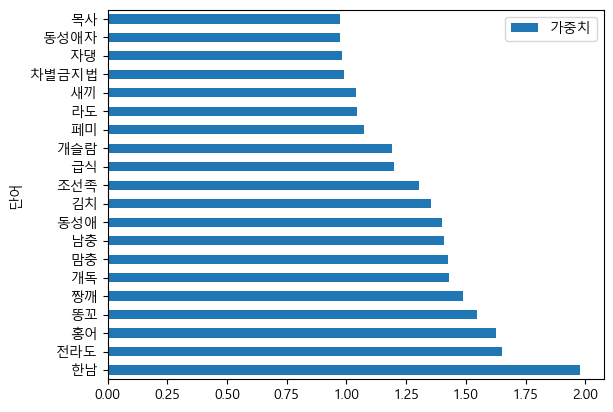

In [290]:
# bar chart 시각화
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic" #한글설정

unsmile_df.head(20).set_index("단어").plot(kind = "barh")